<a href="https://colab.research.google.com/github/BhavikPrajapati18/DS_PRAC/blob/main/Ques3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

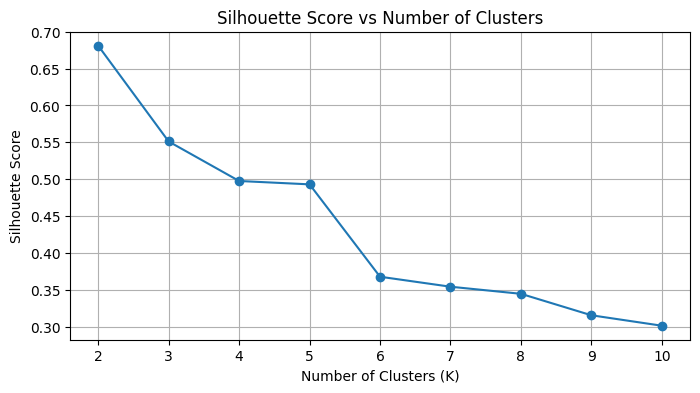

Best number of clusters (K) based on Silhouette Score: 2


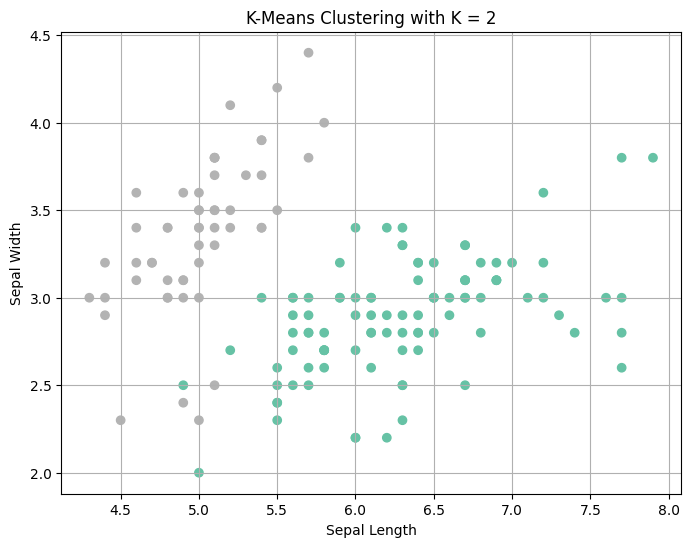

Cluster Centers:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           6.301031          2.886598           4.958763          1.695876
1           5.005660          3.369811           1.560377          0.290566

Data Points per Cluster:
cluster
0    97
1    53
Name: count, dtype: int64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

best_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Best number of clusters (K) based on Silhouette Score: {best_k}")

final_kmeans = KMeans(n_clusters=best_k, random_state=42)
X['cluster'] = final_kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X['cluster'], cmap='Set2')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title(f'K-Means Clustering with K = {best_k}')
plt.grid(True)
plt.show()

print("Cluster Centers:\n")
centers = pd.DataFrame(final_kmeans.cluster_centers_, columns=iris.feature_names)
print(centers)

print("\nData Points per Cluster:")
print(X['cluster'].value_counts())


# New section